In [172]:
print("Hello World!")

Hello World!


In [173]:
# importing relevant modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from datetime import datetime

## Capital Bike Share

In [174]:
""""
This dataset contains the hourly and daily count of rental bikes between years 2022 and 2023 in Capital bikeshare system with the corresponding weather and seasonal information.

Additional Information aboutb the Variable.
Both hourly.csv and daily.csv have the following fields, except hour which is not available in daily.csv

 Casual: count of casual users
 Member: count of member users
 Date: Year:month:day
 Hour: (0 to 23)
 Total_rides: count of total rental bikes including both casual and members 
 relativehumidity_2m (%): Normalized humidity. The values are divided to 100
 temperature_2m (°C):Normalized temperature in Celsius
 apparent_temperature_mean (°C): Normalized feeling temperature in Celsius.
 weathercode (wmo code): represents different weather conditions. 
 windspeed_10m (km/h): Normalized wind speed 



"""

'"\nThis dataset contains the hourly and daily count of rental bikes between years 2022 and 2023 in Capital bikeshare system with the corresponding weather and seasonal information.\n\nAdditional Information aboutb the Variable.\nBoth hourly.csv and daily.csv have the following fields, except hour which is not available in daily.csv\n\n Casual: count of casual users\n Member: count of member users\n Date: Year:month:day\n Hour: (0 to 23)\n Total_rides: count of total rental bikes including both casual and members \n relativehumidity_2m (%): Normalized humidity. The values are divided to 100\n temperature_2m (°C):Normalized temperature in Celsius\n apparent_temperature_mean (°C): Normalized feeling temperature in Celsius.\n weathercode (wmo code): represents different weather conditions. \n windspeed_10m (km/h): Normalized wind speed \n\n\n\n'

## Loading Hourly Dataset

In [175]:
# loading csv file
hour=pd.read_csv("CBS_2021-2023_Hourly_Weather.csv", sep=None)

C:\Users\godwi\AppData\Local\Temp\ipykernel_19116\2537278405.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  hour=pd.read_csv("CBS_2021-2023_Hourly_Weather.csv", sep=None)


In [176]:
# getting summary of Data set
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Member                   26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [177]:
hour.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


In [178]:
# getting the statistics of the Dataset
hour.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Casual,26269.0,159.93,167.33,0.0,28.00,105.0,237.00,1206.0
Hour,26280.0,11.50,6.92,0.0,5.75,11.5,17.25,23.0
Member,26269.0,247.17,225.28,0.0,55.00,203.0,371.00,1534.0
Total_rides,26269.0,407.10,373.01,1.0,85.00,319.0,616.00,2262.0
relativehumidity_2m (%),26280.0,62.97,22.72,5.0,46.00,64.0,82.00,100.0
temperature_2m (°C),26280.0,14.41,10.29,-14.6,6.10,14.8,22.70,41.5
weathercode (wmo code),26280.0,7.23,17.63,0.0,0.00,1.0,2.00,75.0
windspeed_10m (km/h),26280.0,10.17,5.26,0.0,6.50,9.2,12.90,40.1


In [179]:
#getting the shape of the DataFrame
hour.shape

(26280, 9)

### Checking for Missing values

In [180]:
## checking for missing values in Data Set
hour.isnull().sum()
## Missing values for casual, member,total_rides are 11,11,11 respectively

Casual                     11
Date                        0
Hour                        0
Member                     11
Total_rides                11
relativehumidity_2m (%)     0
temperature_2m (°C)         0
weathercode (wmo code)      0
windspeed_10m (km/h)        0
dtype: int64

Dropping of missing values

In [181]:
#dropping missing values
hour.dropna(inplace=True)

In [182]:
#resetting index of the Data Frame
hourly=hour.reset_index(drop=True)
# get the info of the Data Frame
print(hourly.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26269 non-null  object 
 2   Hour                     26269 non-null  int64  
 3   Member                   26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26269 non-null  int64  
 6   temperature_2m (°C)      26269 non-null  float64
 7   weathercode (wmo code)   26269 non-null  int64  
 8   windspeed_10m (km/h)     26269 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB
None


## Creating of new columns

In [183]:
#Season
# Function to get season
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

# Function to categorize season based on date
def categorize_season(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    month = dt.month
    return get_season(month)

# Apply function to create a new column
hourly['Season'] = hourly['Date'].apply(categorize_season)



In [184]:
##WEEKDAY
# Function to get weekday
def get_weekday(day):
    weekdays = ["Mon.", "Tue.", "Wed.", "Thur.", "Fri.", "Sat.", "Sun."]
    return weekdays[day]

# Function to categorize weekday based on date
def categorize_week(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    weekday = dt.weekday()  # 0 for Monday, 1 for Tuesday, ..., 6 for Sunday
    return get_weekday(weekday)

# Apply function to create a new column
hourly['Weekday'] = hourly['Date'].apply(categorize_week)

In [185]:
#Month
# Function to get month
def get_month(month):
    months = ["Jan.", "Feb.", "Mar.", "Apr.", "May", "Jun.", "Jul.", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."]
    return months[month - 1]

# Function to categorize month based on date
def categorize_month(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    month = dt.month
    return get_month(month)

# Apply function to create a new column
hourly['Month'] = hourly['Date'].apply(categorize_month)

In [186]:
## Minutes
# Function to convert hours to minutes
def hours_to_minutes(hour):
    return hour * 60

# Apply function to create a new column 'Minutes'
hourly['Minutes'] = hourly['Hour'].apply(hours_to_minutes)


In [187]:
hourly.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),Season,Weekday,Month,Minutes
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,Winter,Fri.,Jan.,0
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,Winter,Fri.,Jan.,60
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,Winter,Fri.,Jan.,120
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,Winter,Fri.,Jan.,180
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,Winter,Fri.,Jan.,240


In [188]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26269 non-null  object 
 2   Hour                     26269 non-null  int64  
 3   Member                   26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26269 non-null  int64  
 6   temperature_2m (°C)      26269 non-null  float64
 7   weathercode (wmo code)   26269 non-null  int64  
 8   windspeed_10m (km/h)     26269 non-null  float64
 9   Season                   26269 non-null  object 
 10  Weekday                  26269 non-null  object 
 11  Month                    26269 non-null  object 
 12  Minutes                  26269 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 2.6+ MB


2021 Data Frame

In [189]:
# Convert 'Date' column to datetime type
hourly['Date'] = pd.to_datetime(hourly['Date'])

# Filter the DataFrame for rows where the year is 2021
hourly_2021 = hourly[hourly['Date'].dt.year == 2021]


In [190]:
hourly_2021.shape

(8752, 13)

2022 Data Frame

In [191]:
# Convert 'Date' column to datetime type
hourly['Date'] = pd.to_datetime(hourly['Date'])

# Filter the DataFrame for rows where the year is 2021
hourly_2022 = hourly[hourly['Date'].dt.year == 2022]


In [192]:
hourly_2022.shape

(8758, 13)

2023 Data Frame

In [193]:
# Convert 'Date' column to datetime type
hourly['Date'] = pd.to_datetime(hourly['Date'])

# Filter the DataFrame for rows where the year is 2021
hourly_2023 = hourly[hourly['Date'].dt.year == 2023]


In [194]:
hourly_2023.shape

(8759, 13)

## Exploratory Data Analysis

Some Hypotheses formulation

In [195]:
"""""
Hourly trend: most of the businesses have rush hours and weak hours. It should not be an exception for bike rentals as well.

Daily Trend: weekdays vs weekends and registered users vs casual users.

Relative humdity: the demand for bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out on less humid days.

Temperature: in warm countries, temperature generally keeps people inside.

Business model: businesses often rely on customers who are members more than casual users. There might be some interesting insights that can strengthen this assumption.
"""

'""\nHourly trend: most of the businesses have rush hours and weak hours. It should not be an exception for bike rentals as well.\n\nDaily Trend: weekdays vs weekends and registered users vs casual users.\n\nRelative humdity: the demand for bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out on less humid days.\n\nTemperature: in warm countries, temperature generally keeps people inside.\n\nBusiness model: businesses often rely on customers who are members more than casual users. There might be some interesting insights that can strengthen this assumption.\n'

Text(0.5, 1.0, 'Season wise Hourly Distribution of Bike Total Rides')

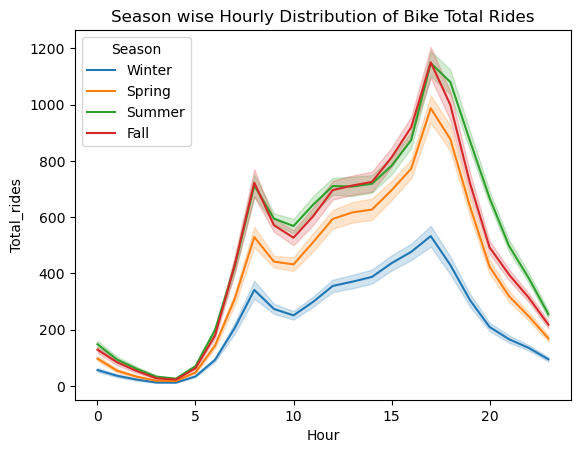

In [196]:

#sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data


# Plot the responses for different events and regions
sns.lineplot(x="Hour", y="Total_rides",
             hue="Season",
             data=hourly)
plt.title("Season wise Hourly Distribution of Bike Total Rides")

Text(0.5, 1.0, '2021 Monthly Ride Count')

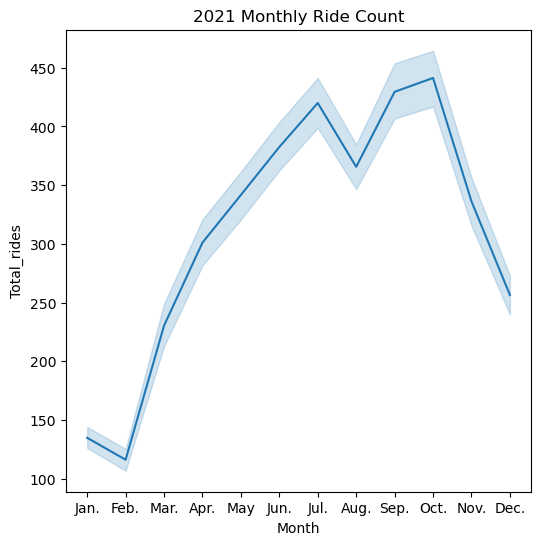

In [197]:
plt.figure(figsize=(6, 6))
sns.lineplot(x="Month", y="Total_rides",
      
             data=hourly_2021)
plt.title("2021 Monthly Ride Count")